# K-Nearest Neighbour Model for Binary Classification
This notebook is the implementation of K-Nearest Neighbour for Binary Classification and this has 3 main parts
1. **Part A:** Model Code
1. **Part B:** Data Processing
1. **Part C:** Model Evaluation
A written report would also be included on the data and the KNN Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial import distance

## Part A

### 1. Write a function to calculate and return the Euclidean distance of two vectors.

In [3]:
"""
Calculation of Euclidean Distance with Matrix Notation
Input:
    x,y: 1D array_like types (will be converted to ndarray)
    dist: Euclidean Distance of x and y
"""
def euclidean_dist(x, y):
    x = np.array(x)
    y = np.array(y)
    diff = x - y
    dist = np.sqrt(np.dot(diff,diff))
    return dist

In [4]:
# 2 Khalid

### 3. Write a function to calculate and return the accuracy and generalization error of two vectors. This function takes two one-dimensional arrays as input: one containing the true labels and one containing the predicted labels.

In [5]:
"""
Calculates the accuracy between the true and predicted labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    accuracy: accuracy expressed in decimal
"""
def accuracy(true, pred):
    match = map(lambda x,y: x == y, list(true), list(pred))
    match = map(lambda x: 1 if x else 0, list(match))
    accuracy = np.mean(list(match))
    return accuracy

In [6]:
# 4 Khalid

### 5. Write a function to compute the confusion matrix of two vectors. This function takes two one-dimensional arrays as input: one containing the true labels and one containing the predicted labels.


In [7]:
'''
Produces confusion matrix (assuming binary classification) given predicted
and true labels
Input: 
    true: array_like type vector of true labels
    pred: array_like type vector of predicted labels
Output:
    Confusion Matrix: 2D ndarray of the following format (same as sklearn)
    array([[tn, fp],
           [fn, tp]])
'''
def confusion_matrix(true, pred):
    tp = map(lambda x,y: 1 if (x == 1 and y == 1) else 0, list(true), list(pred))
    tp = np.sum(list(tp))
    
    tn = map(lambda x,y: 1 if (x == 0 and y == 0) else 0, list(true), list(pred))
    tn = np.sum(list(tn))
    
    fp = map(lambda x,y: 1 if (x == 0 and y == 1) else 0, list(true), list(pred))
    fp = np.sum(list(fp))
    
    fn = map(lambda x,y: 1 if (x == 1 and y == 0) else 0, list(true), list(pred))
    fn = np.sum(list(fn))
    
    return np.array([[tn, fp], [fn, tp]])

### 6. Write a function to generate the Receiver Operating Characteristic (ROC) curve. This function takes the following 3 input: a one-dimensional array containing the true labels, a one-dimensional array containing the probability estimates of the positive class, and a one-dimensional array containing a set of threshold values between 0 and 1. It should return the True Positive Rate (TPR) and False Positive Rate (FPR) as two one-dimensional arrays, as well as draw the ROC curve by using TPR, FPR, and the threshold values.

In [8]:
'''
Takes true label, probability of positive class and threshold and produce the ROC
Curve and returns the true positive rates and false positive rates associated 
with the threshold

Input:
    true: 1D array_like vector of true labels with values 0 or 1
    probability: 1D array_like vector of probability of having positive label in range(0,1)
    threshold: 1D array_like vector in range(0,1)
Output:
    true_positive_rates, false_positive_rates: tpr and fpr rates corresponding to threshold
    ROC Curve Plot
'''
def roc_curve(true, probability, threshold, plot = True):
    true_positive_rates = []
    false_positive_rates = []
    
    for t in threshold:
        pred = list(map(lambda x: 1 if x >= t else 0, list(probability)))

        tn,fp,fn,tp = confusion_matrix(true, pred).ravel()
        
        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        
        true_positive_rates.append(tpr)
        false_positive_rates.append(fpr)
        
    if plot:
        plt.figure()
        plt.plot(true_positive_rates, false_positive_rates)
        plt.xlabel("True Positive Rate")
        plt.ylabel("False Positive Rate")
        plt.xlim([0,1.0])
        plt.ylim([0,1.0])
        plt.title('Receiver Operating Characteristic Curve')
        
    return true_positive_rates, false_positive_rates

Testing

([1.0, 1.0, 1.0, 0.75, 0.5, 0.5, 0.25, 0.0, 0.0],
 [1.0, 1.0, 0.6, 0.4, 0.2, 0.2, 0.2, 0.0, 0.0])

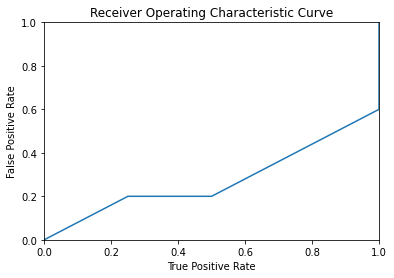

In [9]:
true = [1,1,0,0,1,1,0,0,0]
probability = [0.6,0.7,0.1,0.2,0.4,0.3,0.4,0.3,0.7]
threshold = [0,0.1,0.21,0.31,0.41,0.51,0.61,0.71,1]
roc_curve(true, probability, threshold)

### 7. Write a function to compute area under curve (AUC) for the ROC curve. This function takes the following 2 input: a one-dimensional array containing the true labels and a one-dimensional array containing the probability estimates of the positive class. For integration along the given axis required to compute the AUC score, you may use the numpy.trapz() function.


In [10]:
'''
Given true labels and probability of positive labels, returns the area under the curve of the ROC
Input:
    true: 1D array_like vector of true labels with values 0 or 1
    probability: 1D array_like vector of probability of having positive label in range(0,1)
Output:
    Area Under the Curve, range(0,1)
'''
def area_under_curve(true, probability):
    threshold = [x/100 for x in range(0,101)]
    
    tpr, fpr = roc_curve(true, probability, threshold, plot = False)
    
    return abs(np.trapz(fpr,tpr))

In [11]:
area_under_curve(true, probability)

0.275

In [12]:
# 8 Khalid

In [13]:
# 9 Some time later

## Part B

In [14]:
# 10-14 Khalid

In [15]:
# 15&16 Justin

## Part C

In [16]:
# TO DO LATER